In [159]:
import xml.etree.ElementTree as ET
tree = ET.parse('nobeleu.xml')
root = tree.getroot()
print(root.tag)

network


In [160]:
for child in root:
    print(child.tag)

networkStructure
demands


In [161]:
network_structure = root.find('./networkStructure')
nodes = root.find("networkStructure/nodes")
nodes=[]
links=[]

In [162]:
nodes = root.find('networkStructure/nodes')

for node in nodes.findall('node'):
    node_id = node.get('id')
    coordinates = node.find('coordinates')

    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
        print(f"Node ID: {node_id}, Coordinates: ({x}, {y})")


Node ID: Amsterdam, Coordinates: (4.51, 52.2)
Node ID: Athens, Coordinates: (23.42, 37.58)
Node ID: Barcelona, Coordinates: (2.07, 41.22)
Node ID: Belgrade, Coordinates: (20.25, 44.47)
Node ID: Berlin, Coordinates: (13.21, 52.31)
Node ID: Bordeaux, Coordinates: (-0.35, 44.51)
Node ID: Brussels, Coordinates: (4.2, 50.49)
Node ID: Budapest, Coordinates: (19.02, 47.29)
Node ID: Copenhagen, Coordinates: (12.32, 55.41)
Node ID: Dublin, Coordinates: (-6.15, 53.21)
Node ID: Frankfurt, Coordinates: (8.38, 50.07)
Node ID: Glasgow, Coordinates: (-4.16, 55.51)
Node ID: Hamburg, Coordinates: (10.0, 53.33)
Node ID: London, Coordinates: (-0.07, 51.3)
Node ID: Lyon, Coordinates: (4.49, 45.43)
Node ID: Madrid, Coordinates: (-3.42, 40.25)
Node ID: Milan, Coordinates: (9.11, 45.28)
Node ID: Munich, Coordinates: (11.33, 48.07)
Node ID: Oslo, Coordinates: (10.45, 59.54)
Node ID: Paris, Coordinates: (2.2, 48.51)
Node ID: Prague, Coordinates: (14.25, 50.04)
Node ID: Rome, Coordinates: (12.29, 41.53)
Node ID

In [163]:
capacities = []
costs = []
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')

        source_elem = link.find('source')
        source = source_elem.text if source_elem is not None else None
        
        target_elem = link.find('target')
        target = target_elem.text if target_elem is not None else None
        
        additional_module = link.find('additionalModules')
        if additional_module is not None:
            pre_installed_module = additional_module.find('addModule')
            if pre_installed_module is not None:
                capacity_elem = pre_installed_module.find('capacity')
                capacity = capacity_elem.text if capacity_elem is not None else None
                
                cost_elem = pre_installed_module.find('cost')
                cost = cost_elem.text if cost_elem is not None else None
                
                if capacity is not None and cost is not None:
                    capacities.append(float(capacity))
                    costs.append(float(cost))
                
                print(f"Link ID: {link_id}, Source: {source}, Target: {target}, Capacity: {capacity}, Cost: {cost}")

# Output the capacities and costs
print("Costs:", costs)

Link ID: L1, Source: Amsterdam, Target: Brussels, Capacity: 20.0, Cost: 3580.0
Link ID: L2, Source: Amsterdam, Target: Glasgow, Capacity: 20.0, Cost: 7880.0
Link ID: L3, Source: Amsterdam, Target: Hamburg, Capacity: 20.0, Cost: 4870.0
Link ID: L4, Source: Amsterdam, Target: London, Capacity: 20.0, Cost: 4870.0
Link ID: L5, Source: Athens, Target: Belgrade, Capacity: 20.0, Cost: 8740.0
Link ID: L6, Source: Athens, Target: Rome, Capacity: 20.0, Cost: 10030.0
Link ID: L7, Source: Barcelona, Target: Lyon, Capacity: 20.0, Cost: 6160.0
Link ID: L8, Source: Barcelona, Target: Madrid, Capacity: 20.0, Cost: 6160.0
Link ID: L9, Source: Belgrade, Target: Budapest, Capacity: 20.0, Cost: 4440.0
Link ID: L10, Source: Belgrade, Target: Zagreb, Capacity: 20.0, Cost: 4870.0
Link ID: L11, Source: Berlin, Target: Copenhagen, Capacity: 20.0, Cost: 4870.0
Link ID: L12, Source: Berlin, Target: Hamburg, Capacity: 20.0, Cost: 4010.0
Link ID: L13, Source: Berlin, Target: Munich, Capacity: 20.0, Cost: 6160.0
Li

In [164]:
demands = root.find('demands').findall('demand')

# Iterate over each demand and extract id and demandValue
for demand in demands:
    demand_id = demand.attrib['id']
    demand_value_elem = demand.find('demandValue')
    if demand_value_elem is not None:
        demand_value = demand_value_elem.text
        print(f"Demand ID: {demand_id}")
        print(f"Demand Value: {demand_value}\n")
    else:
        print(f"No demandValue found for demand ID: {demand_id}")


Demand ID: AmsterdamAthens
Demand Value: 6.0

Demand ID: AmsterdamBarcelona
Demand Value: 6.0

Demand ID: AmsterdamBelgrade
Demand Value: 2.0

Demand ID: AmsterdamBerlin
Demand Value: 16.0

Demand ID: AmsterdamBordeaux
Demand Value: 4.0

Demand ID: AmsterdamBrussels
Demand Value: 16.0

Demand ID: AmsterdamBudapest
Demand Value: 4.0

Demand ID: AmsterdamCopenhagen
Demand Value: 8.0

Demand ID: AmsterdamDublin
Demand Value: 4.0

Demand ID: AmsterdamFrankfurt
Demand Value: 20.0

Demand ID: AmsterdamGlasgow
Demand Value: 26.0

Demand ID: AmsterdamHamburg
Demand Value: 28.0

Demand ID: AmsterdamLondon
Demand Value: 38.0

Demand ID: AmsterdamLyon
Demand Value: 8.0

Demand ID: AmsterdamMadrid
Demand Value: 6.0

Demand ID: AmsterdamMilan
Demand Value: 16.0

Demand ID: AmsterdamMunich
Demand Value: 14.0

Demand ID: AmsterdamOslo
Demand Value: 8.0

Demand ID: AmsterdamParis
Demand Value: 10.0

Demand ID: AmsterdamPrague
Demand Value: 8.0

Demand ID: AmsterdamRome
Demand Value: 14.0

Demand ID: A

In [165]:
gml_output = "graph [\n"
id_count = 0
eid_count = 0
nodes_list = []

nodes = root.find('networkStructure/nodes')
for node in nodes.findall('node'):
    node_id = node.get('id')
    nodes_list.append(node_id)
    
    coordinates = node.find('coordinates')
    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
    else:
        x = '0'  
        y = '0'  
    gml_output += '  node [\n'
    gml_output += f'    id {id_count}\n'
    gml_output += f'    label "{node_id}"\n'
    gml_output += f'    country "US"\n'
    gml_output += f'    Longitude {x}\n'
    gml_output += f'    Latitude {y}\n'
    gml_output += '  ]\n'
    
    id_count += 1

demand_values = {}
demands = root.find('demand')
if demands is not None:
    for demand in demands.findall('demand'):
        demand_id = demand.get('id')
        demand_value_elem = demand.find('demandValue')
        if demand_value_elem is not None:
            demand_values[demand_id] = demand_value_elem.text
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')
        
        source_elem = link.find('source')
        target_elem = link.find('target')
        
        if source_elem is not None and target_elem is not None:
            source_id = source_elem.text
            target_id = target_elem.text
            
            if source_id in nodes_list and target_id in nodes_list:
                source = nodes_list.index(source_id)
                target = nodes_list.index(target_id)
            else:
                continue  
            
            additional_module = link.find('additionalModules')
            if additional_module is not None:
                pre_installed_module = additional_module.find('addModule')
                if pre_installed_module is not None:
                    capacity_elem = pre_installed_module.find('capacity')
                    cost_elem = pre_installed_module.find('cost')
                    
                    if capacity_elem is not None:
                        capacity = capacity_elem.text
                    else:
                        capacity = '0' 
                    
                    if cost_elem is not None:
                        cost = cost_elem.text
                    else:
                        cost = '0'  
                    demand_value = demand_values.get(link_id, '0')
                    gml_output += '  edge [\n'
                    gml_output += f'    id {eid_count}\n'
                    gml_output += f'    link_label "{link_id}"\n'
                    gml_output += f'    source {source}\n'
                    gml_output += f'    target {target}\n'
                    gml_output += f'    capacity {capacity}\n'
                    gml_output += f'    cost {cost}\n'
                    gml_output += f'    demandValue {demand_value}\n'
                    gml_output += '  ]\n'
                    
                    eid_count += 1
else:
    print("No links found in the XML structure.")

gml_output += "]"

output_file = 'Nobeleu.gml'
with open(output_file, 'w') as f:
    f.write(gml_output)

print(f"GML file '{output_file}' has been created successfully.")

GML file 'Nobeleu.gml' has been created successfully.


In [166]:
import networkx as nx
G= nx.read_gml("nobeleu.gml")
print(G.nodes(data=True))

[('Amsterdam', {'country': 'US', 'Longitude': 4.51, 'Latitude': 52.2}), ('Athens', {'country': 'US', 'Longitude': 23.42, 'Latitude': 37.58}), ('Barcelona', {'country': 'US', 'Longitude': 2.07, 'Latitude': 41.22}), ('Belgrade', {'country': 'US', 'Longitude': 20.25, 'Latitude': 44.47}), ('Berlin', {'country': 'US', 'Longitude': 13.21, 'Latitude': 52.31}), ('Bordeaux', {'country': 'US', 'Longitude': -0.35, 'Latitude': 44.51}), ('Brussels', {'country': 'US', 'Longitude': 4.2, 'Latitude': 50.49}), ('Budapest', {'country': 'US', 'Longitude': 19.02, 'Latitude': 47.29}), ('Copenhagen', {'country': 'US', 'Longitude': 12.32, 'Latitude': 55.41}), ('Dublin', {'country': 'US', 'Longitude': -6.15, 'Latitude': 53.21}), ('Frankfurt', {'country': 'US', 'Longitude': 8.38, 'Latitude': 50.07}), ('Glasgow', {'country': 'US', 'Longitude': -4.16, 'Latitude': 55.51}), ('Hamburg', {'country': 'US', 'Longitude': 10.0, 'Latitude': 53.33}), ('London', {'country': 'US', 'Longitude': -0.07, 'Latitude': 51.3}), ('Ly

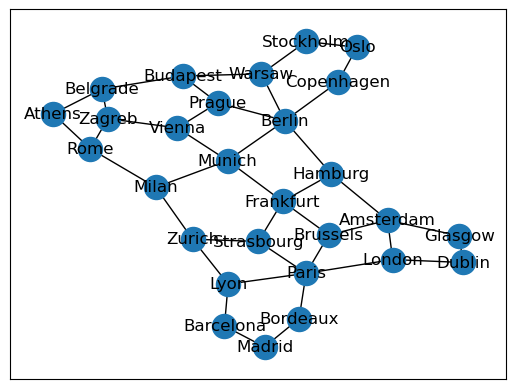

In [167]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G,seed=3113794652)
nx.draw_networkx(G,pos,with_labels=True)

In [168]:
import math
def harvesine(origin, destination):
        print(origin)
        print(destination)
        lat1, lon1 = origin
        lat2, lon2 = destination
        radius = 6371000
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d

In [169]:
def add_latency_info(G):

    for i in G.edges:
            
            orig,dest = i
            
            dist = harvesine([G.nodes[orig]['Latitude'],G.nodes[orig]['Longitude']],[G.nodes[dest]['Latitude'],G.nodes[dest]['Longitude']])
            latency = dist/(2*10**8)
            latency = latency * 1000   # scale factor just to show better in the graph
            latency = round(latency,2)
            G.edges[i]['weight'] = latency
add_latency_info(G)

[52.2, 4.51]
[50.49, 4.2]
[52.2, 4.51]
[55.51, -4.16]
[52.2, 4.51]
[53.33, 10.0]
[52.2, 4.51]
[51.3, -0.07]
[37.58, 23.42]
[44.47, 20.25]
[37.58, 23.42]
[41.53, 12.29]
[41.22, 2.07]
[45.43, 4.49]
[41.22, 2.07]
[40.25, -3.42]
[44.47, 20.25]
[47.29, 19.02]
[44.47, 20.25]
[45.48, 15.57]
[52.31, 13.21]
[55.41, 12.32]
[52.31, 13.21]
[53.33, 10.0]
[52.31, 13.21]
[48.07, 11.33]
[52.31, 13.21]
[50.04, 14.25]
[52.31, 13.21]
[52.14, 20.59]
[44.51, -0.35]
[40.25, -3.42]
[44.51, -0.35]
[48.51, 2.2]
[50.49, 4.2]
[50.07, 8.38]
[50.49, 4.2]
[48.51, 2.2]
[47.29, 19.02]
[50.04, 14.25]
[47.29, 19.02]
[52.14, 20.59]
[55.41, 12.32]
[59.54, 10.45]
[53.21, -6.15]
[55.51, -4.16]
[53.21, -6.15]
[51.3, -0.07]
[50.07, 8.38]
[53.33, 10.0]
[50.07, 8.38]
[48.07, 11.33]
[50.07, 8.38]
[48.35, 7.45]
[51.3, -0.07]
[48.51, 2.2]
[45.43, 4.49]
[48.51, 2.2]
[45.43, 4.49]
[47.22, 8.32]
[45.28, 9.11]
[48.07, 11.33]
[45.28, 9.11]
[41.53, 12.29]
[45.28, 9.11]
[47.22, 8.32]
[48.07, 11.33]
[48.12, 16.21]
[59.54, 10.45]
[59.19, 

In [170]:
npmatrix=[]
for i in G.nodes:
    eachrow=[]
    for j in G.nodes:
        eachrow.append(nx.dijkstra_path_length(G,i,j))
    npmatrix.append(eachrow)
print(npmatrix)

[[0, 12.490000000000002, 6.74, 8.440000000000001, 3.17, 4.710000000000001, 0.96, 6.800000000000001, 4.92, 3.9699999999999998, 2.46, 3.38, 1.95, 1.65, 4.2, 7.390000000000001, 5.3, 4.01, 7.279999999999999, 2.2800000000000002, 4.48, 7.75, 9.44, 3.4699999999999998, 5.760000000000001, 5.68, 7.250000000000001, 4.18], [12.49, 0, 13.14, 4.05, 9.32, 13.9, 12.040000000000001, 5.6899999999999995, 11.07, 15.540000000000001, 10.540000000000001, 15.870000000000001, 10.540000000000001, 13.22, 10.6, 15.510000000000002, 7.7, 9.27, 13.43, 11.47, 8.01, 5.25, 12.44, 9.530000000000001, 7.46, 8.44, 5.97, 8.82], [6.74, 13.14, 0, 12.370000000000001, 9.16, 5.050000000000001, 5.78, 12.620000000000001, 10.91, 8.53, 6.04, 9.959999999999999, 7.9399999999999995, 6.21, 2.54, 2.37, 5.44, 7.210000000000001, 13.27, 4.46, 10.3, 7.890000000000001, 15.43, 5.03, 9.020000000000001, 11.67, 10.450000000000001, 4.32], [8.44, 4.05, 12.370000000000001, 0, 5.27, 12.02, 8.27, 1.64, 7.02, 12.41, 6.7700000000000005, 11.82, 6.4899999

In [171]:
import networkx as nx

graph = nx.read_gml('Nobeleu.gml')
cost = []
demand = []

for _, _, data in graph.edges(data=True):
    costs.append(data['cost'])
    demands.append(data['demandValue'])

print("Costs:", costs)
print("Demands:", demands)


AttributeError: 'NoneType' object has no attribute 'append'

In [ ]:
import numpy as np
import random
latency_matrix = [
    [0, 12.49, 6.74, 8.44, 3.17, 4.71, 0.96, 6.8, 4.92, 3.97, 2.46, 3.38, 1.95, 1.65, 4.2, 7.39, 5.3, 4.01, 7.28, 2.28, 4.48, 7.75, 9.44, 3.47, 5.76, 5.68, 7.25, 4.18],
    [12.49, 0, 13.14, 4.05, 9.32, 13.9, 12.04, 5.69, 11.07, 15.54, 10.54, 15.87, 10.54, 13.22, 10.6, 15.51, 7.7, 9.27, 13.43, 11.47, 8.01, 5.25, 12.44, 9.53, 7.46, 8.44, 5.97, 8.82],
    [6.74, 13.14, 0, 12.37, 9.16, 5.05, 5.78, 12.62, 10.91, 8.53, 6.04, 9.96, 7.94, 6.21, 2.54, 2.37, 5.44, 7.21, 13.27, 4.46, 10.3, 7.89, 15.43, 5.03, 9.02, 11.67, 10.45, 4.32],
    [8.44, 4.05, 12.37, 0, 5.27, 12.02, 8.27, 1.64, 7.02, 12.41, 6.77, 11.82, 6.49, 10.09, 9.83, 14.7, 6.93, 5.22, 9.38, 9.59, 3.96, 4.48, 8.39, 7.78, 3.41, 4.39, 1.92, 8.05],
    [3.17, 9.32, 9.16, 5.27, 0, 7.88, 4.13, 3.63, 1.75, 7.14, 3.12, 6.55, 1.22, 4.82, 6.62, 10.56, 4.22, 2.45, 4.11, 5.45, 1.31, 6.64, 6.27, 4.13, 2.59, 2.51, 4.08, 4.84],
    [4.71, 13.9, 5.05, 12.02, 7.88, 0, 3.75, 11.51, 9.63, 6.5, 5.25, 7.93, 6.66, 4.18, 4.35, 2.68, 6.2, 6.8, 11.99, 2.43, 9.19, 8.65, 14.15, 4.37, 8.61, 10.39, 10.1, 5.08],
    [0.96, 12.04, 5.78, 8.27, 4.13, 3.75, 0, 7.76, 5.88, 4.93, 1.5, 4.34, 2.91, 2.61, 3.24, 6.43, 4.34, 3.05, 8.24, 1.32, 5.44, 6.79, 10.4, 2.51, 4.86, 6.64, 6.35, 3.22],
    [6.8, 5.69, 12.62, 1.64, 3.63, 11.51, 7.76, 0, 5.38, 10.77, 6.75, 10.18, 4.85, 8.45, 10.08, 14.19, 7.18, 5.41, 7.74, 9.08, 2.32, 6.12, 6.75, 7.76, 3.6, 2.75, 3.56, 8.3],
    [4.92, 11.07, 10.91, 7.02, 1.75, 9.63, 5.88, 5.38, 0, 8.89, 4.87, 8.3, 2.97, 6.57, 8.37, 12.31, 5.97, 4.2, 2.36, 7.2, 3.06, 8.39, 4.52, 5.88, 4.34, 4.26, 5.83, 6.59],
    [3.97, 15.54, 8.53, 12.41, 7.14, 6.5, 4.93, 10.77, 8.89, 0, 6.43, 1.43, 5.92, 2.32, 5.99, 9.18, 7.84, 7.98, 11.25, 4.07, 8.45, 10.29, 13.41, 6.01, 9.73, 9.65, 11.22, 6.72],
    [2.46, 10.54, 6.04, 6.77, 3.12, 5.25, 1.5, 6.75, 4.87, 6.43, 0, 5.84, 1.9, 4.11, 3.5, 7.93, 2.84, 1.55, 7.23, 2.82, 4.43, 5.29, 9.39, 1.01, 3.36, 5.63, 4.85, 1.72],
    [3.38, 15.87, 9.96, 11.82, 6.55, 7.93, 4.34, 10.18, 8.3, 1.43, 5.84, 0, 5.33, 3.75, 7.42, 10.61, 8.68, 7.39, 10.66, 5.5, 7.86, 11.13, 12.82, 6.85, 9.14, 9.06, 10.63, 7.56],
    [1.95, 10.54, 7.94, 6.49, 1.22, 6.66, 2.91, 4.85, 2.97, 5.92, 1.9, 5.33, 0, 3.6, 5.4, 9.34, 4.74, 3.45, 5.33, 4.23, 2.53, 7.19, 7.49, 2.91, 3.81, 3.73, 5.3, 3.62],
    [1.65, 13.22, 6.21, 10.09, 4.82, 4.18, 2.61, 8.45, 6.57, 2.32, 4.11, 3.75, 3.6, 0, 3.67, 6.86, 5.52, 5.66, 8.93, 1.75, 6.13, 7.97, 11.09, 3.69, 7.41, 7.33, 8.9, 4.4],
    [4.2, 10.6, 2.54, 9.83, 6.62, 4.35, 3.24, 10.08, 8.37, 5.99, 3.5, 7.42, 5.4, 3.67, 0, 4.91, 2.89, 4.1, 9.19, 2.7, 7.76, 5.35, 12.07, 2.34, 6.01, 8.66, 7.44, 2.32],
    [7.39, 15.51, 2.37, 14.7, 10.56, 2.68, 6.43, 14.19, 12.31, 9.18, 7.93, 10.61, 9.34, 6.86, 4.91, 0, 6.99, 8.59, 14.95, 5.57, 11.17, 10.76, 17.31, 5.27, 11.34, 14.01, 12.79, 7.67],
    [5.3, 7.7, 5.44, 6.93, 4.22, 6.2, 4.34, 7.18, 5.97, 7.84, 2.84, 8.68, 4.74, 5.52, 2.89, 6.99, 0, 2.71, 7.83, 3.5, 5.96, 4.85, 10.81, 4.33, 3.62, 4.59, 4.07, 5.54],
    [4.01, 9.27, 7.21, 5.22, 2.45, 6.8, 3.05, 5.41, 4.2, 7.98, 1.55, 7.39, 3.45, 5.66, 4.1, 8.59, 2.71, 0, 6.42, 4.63, 4.06, 6.56, 8.84, 3.48, 2.99, 3.97, 3.75, 4.28],
    [7.28, 13.43, 13.27, 9.38, 4.11, 11.99, 8.24, 7.74, 2.36, 11.25, 7.23, 10.66, 5.33, 8.93, 9.19, 14.95, 7.83, 6.42, 0, 9.79, 5.23, 11.48, 4.45, 8.23, 6.69, 6.61, 8.18, 10.06],
    [2.28, 11.47, 4.46, 9.59, 5.45, 2.43, 1.32, 9.08, 7.2, 4.07, 2.82, 5.5, 4.23, 1.75, 2.7, 5.57, 3.5, 4.63, 9.79, 0, 6.99, 6.54, 11.69, 3.35, 6.56, 8.34, 8.05, 4.92],
    [4.48, 8.01, 10.3, 3.96, 1.31, 9.19, 5.44, 2.32, 3.06, 8.45, 4.43, 7.86, 2.53, 6.13, 7.76, 11.17, 5.96, 4.06, 5.23, 6.99, 0, 5.92, 7.58, 5.44, 1.28, 2.71, 1.84, 6.37],
    [7.75, 5.25, 7.89, 4.48, 6.64, 8.65, 6.79, 6.12, 8.39, 10.29, 5.29, 11.13, 7.19, 7.97, 5.35, 10.76, 4.85, 6.56, 11.48, 6.54, 5.92, 0, 10.58, 6.64, 3.92, 5.96, 3.73, 6.82],
    [9.44, 12.44, 15.43, 8.39, 6.27, 14.15, 10.4, 6.75, 4.52, 13.41, 9.39, 12.82, 7.49, 11.09, 12.07, 17.31, 10.81, 8.84, 4.45, 11.69, 7.58, 10.58, 0, 9.81, 8.27, 8.19, 9.76, 11.64],
    [3.47, 9.53, 5.03, 7.78, 4.13, 4.37, 2.51, 7.76, 5.88, 6.01, 1.01, 6.85, 2.91, 3.69, 2.34, 5.27, 4.33, 3.48, 8.23, 3.35, 5.44, 6.64, 9.81, 0, 3.27, 6.02, 4.8, 2.61],
    [5.76, 7.46, 9.02, 3.41, 2.59, 8.61, 4.86, 3.6, 4.34, 9.73, 3.36, 9.14, 3.81, 7.41, 6.01, 11.34, 3.62, 2.99, 6.69, 6.56, 1.28, 3.92, 8.27, 3.27, 0, 2.78, 1.57, 5.53],
    [5.68, 8.44, 11.67, 4.39, 2.51, 10.39, 6.64, 2.75, 4.26, 9.65, 5.63, 9.06, 3.73, 7.33, 8.66, 14.01, 4.59, 3.97, 6.61, 8.34, 2.71, 5.96, 8.19, 6.02, 2.78, 0, 2.57, 6.45],
    [7.25, 5.97, 10.45, 1.92, 4.08, 10.1, 6.35, 3.56, 5.83, 11.22, 4.85, 10.63, 5.3, 8.9, 7.44, 12.79, 4.07, 3.75, 8.18, 8.05, 1.84, 3.73, 9.76, 4.8, 1.57, 2.57, 0, 5.53],
    [4.18, 8.82, 4.32, 8.05, 4.84, 5.08, 3.22, 8.3, 6.59, 6.72, 1.72, 7.56, 3.62, 4.4, 2.32, 7.67, 5.54, 4.28, 10.06, 4.92, 6.37, 6.82, 11.64, 2.61, 5.53, 6.45, 5.53, 0]
]
cost=[3580.0, 7880.0, 4870.0, 4870.0, 8740.0, 10030.0, 6160.0, 6160.0, 4440.0, 4870.0, 4870.0, 4010.0, 6160.0, 4440.0, 6160.0, 6590.0, 6160.0, 4440.0, 6160.0, 5730.0, 6590.0, 6160.0, 4440.0, 5730.0, 5300.0, 4440.0, 3580.0, 4870.0, 5300.0, 4870.0, 4870.0, 6160.0, 4010.0, 4870.0, 5300.0, 5300.0, 4010.0, 6160.0, 8740.0, 3150.0, 4440.0]
demand=[16, 26, 28, 38, 2, 2, 4, 6, 2, 2, 4, 14, 8, 8, 12, 4, 4, 10, 4, 2, 4, 2, 4, 6, 20, 32, 24, 22, 4, 2, 12, 10, 8, 4, 2, 2, 2, 2, 4, 8, 2] 
print(len(cost))
print(len(demand))
num_nodes = 28
bandwidth = np.array([random.uniform(5, 10) for _ in range(28)])

41
41


In [ ]:
import numpy as np
import random
bandwidth = np.array([random.uniform(5, 10) for _ in range(28)])
cost = [3580.0, 7880.0, 4870.0, 4870.0, 8740.0, 10030.0, 6160.0, 6160.0, 4440.0, 4870.0, 4870.0, 4010.0, 6160.0, 4440.0, 6160.0, 6590.0, 6160.0, 4440.0, 6160.0, 5730.0, 6590.0, 6160.0, 4440.0, 5730.0, 5300.0, 4440.0, 3580.0, 4870.0, 5300.0, 4870.0, 4870.0, 6160.0, 4010.0, 4870.0, 5300.0, 5300.0, 4010.0, 6160.0, 8740.0, 3150.0, 4440.0]
demand = [16, 26, 28, 38, 2, 2, 4, 6, 2, 2, 4, 14, 8, 8, 12, 4, 4, 10, 4, 2, 4, 2, 4, 6, 20, 32, 24, 22, 4, 2, 12, 10, 8, 4, 2, 2, 2, 2, 4, 8, 2]
num_controllers=6
def fitness_function(controllers, latency_matrix, cost, bandwidth, demand):
    delay = np.mean([latency_matrix[controller] for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    total_demand = sum(demand[controller] for controller in controllers)
    if delay == 0:
            delay_fitness = 0
    else:
            delay_fitness = 1 / delay
        
    if total_cost == 0:
            cost_fitness = 0
    else:
            cost_fitness = 1 / total_cost
    fitness = 1 / delay_fitness + total_bandwidth + 1 / cost_fitness + total_demand
    return fitness

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    population = initialize_population(pop_size, num_nodes, num_controllers)
    num_controllers=6
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if fitness_function(new_individual, latency_matrix, cost, bandwidth, demand) > fitness_function(population[i], latency_matrix, cost, bandwidth, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)

def evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers):
    fitness_scores = []
    for num_controllers in range(1, max_controllers + 1):
        best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers)
        fitness = fitness_function(best_controllers, latency_matrix, cost, bandwidth, demand)
        fitness_scores.append((num_controllers, fitness))
    return fitness_scores





best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand,num_controllers)
print(f"Best controllers: {best_controllers}")


Best controllers: [13, 3, 14, 0, 8, 25]


In [ ]:
import numpy as np

# Assuming latency_matrix is a 2D list
latency_matrix = np.array(latency_matrix)

def cluster_switches(latency_matrix, best_controllers, demand):
    num_switches = len(latency_matrix)
    clusters = {f'Controller {i}': [] for i in best_controllers}
    
    for switch in range(num_switches):
        if switch not in best_controllers:
            min_latency = float('inf')
            assigned_controller = None
            for controller in best_controllers:
                latency = latency_matrix[switch, controller] * demand[switch]
                if latency < min_latency:
                    min_latency = latency
                    assigned_controller = controller
            clusters[f'Controller {assigned_controller}'].append(switch)
    
    return clusters

clusters = cluster_switches(latency_matrix, best_controllers, demand)

print("Clusters:")
for controller, switches in clusters.items():
    print(f"{controller}: {switches}")

Clusters:
Controller 13: [5, 9, 19]
Controller 3: [1, 7, 21, 26]
Controller 14: [2, 15, 16, 23, 27]
Controller 0: [6, 10, 11, 12]
Controller 8: [4, 18, 22]
Controller 25: [17, 20, 24]


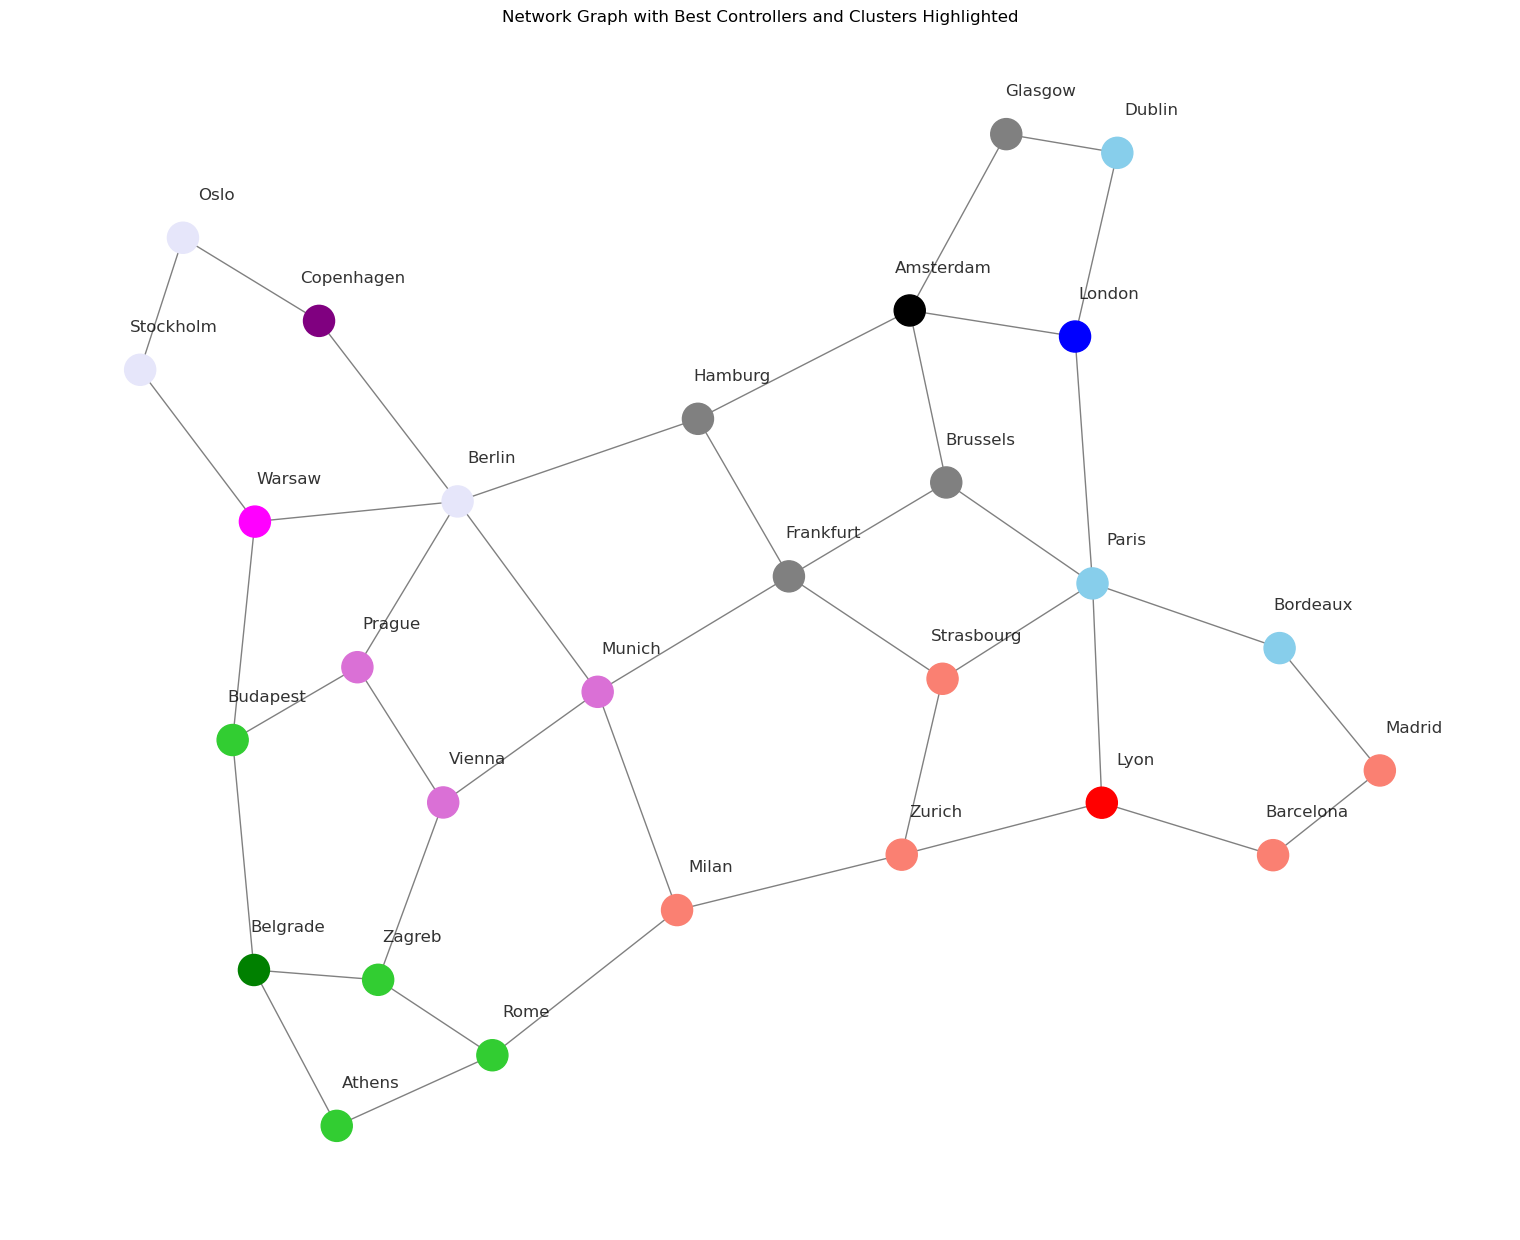

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mc

def lighten_color(color):
    c = mc.cnames.get(color, color)
    c = mc.to_rgb(c)
    return '#%02x%02x%02x' % tuple(int(x * 255 * 1.2) for x in c)

def plot_network(G, best_controllers, clusters,y_off=0.05, x_off=0.05):
    pos = nx.spring_layout(G)
    node_colors = ['black' for _ in G.nodes()]
    
    controller_colors = ['blue', 'green', 'red', 'black', 'purple',  'magenta', 'yellow', 'brown', 'pink','cyan']
    floral_colors = ['skyblue', 'limegreen', 'salmon', 'gray', 'lavender',  'orchid', 'lemonchiffon', 'peachpuff', 'palevioletred','turquoise']
    for idx, controller in enumerate(best_controllers):
        node_colors[controller] = controller_colors[idx % len(controller_colors)]
    
    for idx, (controller, switches) in enumerate(clusters.items()):
        floral_color = floral_colors[idx % len(floral_colors)]
        for switch in switches:
            node_colors[switch] = floral_color
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}

    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)

    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

G = nx.read_gml("nobeleu.gml")
clusters = cluster_switches(latency_matrix, best_controllers, demand)
plot_network(G, best_controllers, clusters)

In [184]:
import numpy as np
import random
latency_matrix = [
    [0, 12.49, 6.74, 8.44, 3.17, 4.71, 0.96, 6.8, 4.92, 3.97, 2.46, 3.38, 1.95, 1.65, 4.2, 7.39, 5.3, 4.01, 7.28, 2.28, 4.48, 7.75, 9.44, 3.47, 5.76, 5.68, 7.25, 4.18],
    [12.49, 0, 13.14, 4.05, 9.32, 13.9, 12.04, 5.69, 11.07, 15.54, 10.54, 15.87, 10.54, 13.22, 10.6, 15.51, 7.7, 9.27, 13.43, 11.47, 8.01, 5.25, 12.44, 9.53, 7.46, 8.44, 5.97, 8.82],
    [6.74, 13.14, 0, 12.37, 9.16, 5.05, 5.78, 12.62, 10.91, 8.53, 6.04, 9.96, 7.94, 6.21, 2.54, 2.37, 5.44, 7.21, 13.27, 4.46, 10.3, 7.89, 15.43, 5.03, 9.02, 11.67, 10.45, 4.32],
    [8.44, 4.05, 12.37, 0, 5.27, 12.02, 8.27, 1.64, 7.02, 12.41, 6.77, 11.82, 6.49, 10.09, 9.83, 14.7, 6.93, 5.22, 9.38, 9.59, 3.96, 4.48, 8.39, 7.78, 3.41, 4.39, 1.92, 8.05],
    [3.17, 9.32, 9.16, 5.27, 0, 7.88, 4.13, 3.63, 1.75, 7.14, 3.12, 6.55, 1.22, 4.82, 6.62, 10.56, 4.22, 2.45, 4.11, 5.45, 1.31, 6.64, 6.27, 4.13, 2.59, 2.51, 4.08, 4.84],
    [4.71, 13.9, 5.05, 12.02, 7.88, 0, 3.75, 11.51, 9.63, 6.5, 5.25, 7.93, 6.66, 4.18, 4.35, 2.68, 6.2, 6.8, 11.99, 2.43, 9.19, 8.65, 14.15, 4.37, 8.61, 10.39, 10.1, 5.08],
    [0.96, 12.04, 5.78, 8.27, 4.13, 3.75, 0, 7.76, 5.88, 4.93, 1.5, 4.34, 2.91, 2.61, 3.24, 6.43, 4.34, 3.05, 8.24, 1.32, 5.44, 6.79, 10.4, 2.51, 4.86, 6.64, 6.35, 3.22],
    [6.8, 5.69, 12.62, 1.64, 3.63, 11.51, 7.76, 0, 5.38, 10.77, 6.75, 10.18, 4.85, 8.45, 10.08, 14.19, 7.18, 5.41, 7.74, 9.08, 2.32, 6.12, 6.75, 7.76, 3.6, 2.75, 3.56, 8.3],
    [4.92, 11.07, 10.91, 7.02, 1.75, 9.63, 5.88, 5.38, 0, 8.89, 4.87, 8.3, 2.97, 6.57, 8.37, 12.31, 5.97, 4.2, 2.36, 7.2, 3.06, 8.39, 4.52, 5.88, 4.34, 4.26, 5.83, 6.59],
    [3.97, 15.54, 8.53, 12.41, 7.14, 6.5, 4.93, 10.77, 8.89, 0, 6.43, 1.43, 5.92, 2.32, 5.99, 9.18, 7.84, 7.98, 11.25, 4.07, 8.45, 10.29, 13.41, 6.01, 9.73, 9.65, 11.22, 6.72],
    [2.46, 10.54, 6.04, 6.77, 3.12, 5.25, 1.5, 6.75, 4.87, 6.43, 0, 5.84, 1.9, 4.11, 3.5, 7.93, 2.84, 1.55, 7.23, 2.82, 4.43, 5.29, 9.39, 1.01, 3.36, 5.63, 4.85, 1.72],
    [3.38, 15.87, 9.96, 11.82, 6.55, 7.93, 4.34, 10.18, 8.3, 1.43, 5.84, 0, 5.33, 3.75, 7.42, 10.61, 8.68, 7.39, 10.66, 5.5, 7.86, 11.13, 12.82, 6.85, 9.14, 9.06, 10.63, 7.56],
    [1.95, 10.54, 7.94, 6.49, 1.22, 6.66, 2.91, 4.85, 2.97, 5.92, 1.9, 5.33, 0, 3.6, 5.4, 9.34, 4.74, 3.45, 5.33, 4.23, 2.53, 7.19, 7.49, 2.91, 3.81, 3.73, 5.3, 3.62],
    [1.65, 13.22, 6.21, 10.09, 4.82, 4.18, 2.61, 8.45, 6.57, 2.32, 4.11, 3.75, 3.6, 0, 3.67, 6.86, 5.52, 5.66, 8.93, 1.75, 6.13, 7.97, 11.09, 3.69, 7.41, 7.33, 8.9, 4.4],
    [4.2, 10.6, 2.54, 9.83, 6.62, 4.35, 3.24, 10.08, 8.37, 5.99, 3.5, 7.42, 5.4, 3.67, 0, 4.91, 2.89, 4.1, 9.19, 2.7, 7.76, 5.35, 12.07, 2.34, 6.01, 8.66, 7.44, 2.32],
    [7.39, 15.51, 2.37, 14.7, 10.56, 2.68, 6.43, 14.19, 12.31, 9.18, 7.93, 10.61, 9.34, 6.86, 4.91, 0, 6.99, 8.59, 14.95, 5.57, 11.17, 10.76, 17.31, 5.27, 11.34, 14.01, 12.79, 7.67],
    [5.3, 7.7, 5.44, 6.93, 4.22, 6.2, 4.34, 7.18, 5.97, 7.84, 2.84, 8.68, 4.74, 5.52, 2.89, 6.99, 0, 2.71, 7.83, 3.5, 5.96, 4.85, 10.81, 4.33, 3.62, 4.59, 4.07, 5.54],
    [4.01, 9.27, 7.21, 5.22, 2.45, 6.8, 3.05, 5.41, 4.2, 7.98, 1.55, 7.39, 3.45, 5.66, 4.1, 8.59, 2.71, 0, 6.42, 4.63, 4.06, 6.56, 8.84, 3.48, 2.99, 3.97, 3.75, 4.28],
    [7.28, 13.43, 13.27, 9.38, 4.11, 11.99, 8.24, 7.74, 2.36, 11.25, 7.23, 10.66, 5.33, 8.93, 9.19, 14.95, 7.83, 6.42, 0, 9.79, 5.23, 11.48, 4.45, 8.23, 6.69, 6.61, 8.18, 10.06],
    [2.28, 11.47, 4.46, 9.59, 5.45, 2.43, 1.32, 9.08, 7.2, 4.07, 2.82, 5.5, 4.23, 1.75, 2.7, 5.57, 3.5, 4.63, 9.79, 0, 6.99, 6.54, 11.69, 3.35, 6.56, 8.34, 8.05, 4.92],
    [4.48, 8.01, 10.3, 3.96, 1.31, 9.19, 5.44, 2.32, 3.06, 8.45, 4.43, 7.86, 2.53, 6.13, 7.76, 11.17, 5.96, 4.06, 5.23, 6.99, 0, 5.92, 7.58, 5.44, 1.28, 2.71, 1.84, 6.37],
    [7.75, 5.25, 7.89, 4.48, 6.64, 8.65, 6.79, 6.12, 8.39, 10.29, 5.29, 11.13, 7.19, 7.97, 5.35, 10.76, 4.85, 6.56, 11.48, 6.54, 5.92, 0, 10.58, 6.64, 3.92, 5.96, 3.73, 6.82],
    [9.44, 12.44, 15.43, 8.39, 6.27, 14.15, 10.4, 6.75, 4.52, 13.41, 9.39, 12.82, 7.49, 11.09, 12.07, 17.31, 10.81, 8.84, 4.45, 11.69, 7.58, 10.58, 0, 9.81, 8.27, 8.19, 9.76, 11.64],
    [3.47, 9.53, 5.03, 7.78, 4.13, 4.37, 2.51, 7.76, 5.88, 6.01, 1.01, 6.85, 2.91, 3.69, 2.34, 5.27, 4.33, 3.48, 8.23, 3.35, 5.44, 6.64, 9.81, 0, 3.27, 6.02, 4.8, 2.61],
    [5.76, 7.46, 9.02, 3.41, 2.59, 8.61, 4.86, 3.6, 4.34, 9.73, 3.36, 9.14, 3.81, 7.41, 6.01, 11.34, 3.62, 2.99, 6.69, 6.56, 1.28, 3.92, 8.27, 3.27, 0, 2.78, 1.57, 5.53],
    [5.68, 8.44, 11.67, 4.39, 2.51, 10.39, 6.64, 2.75, 4.26, 9.65, 5.63, 9.06, 3.73, 7.33, 8.66, 14.01, 4.59, 3.97, 6.61, 8.34, 2.71, 5.96, 8.19, 6.02, 2.78, 0, 2.57, 6.45],
    [7.25, 5.97, 10.45, 1.92, 4.08, 10.1, 6.35, 3.56, 5.83, 11.22, 4.85, 10.63, 5.3, 8.9, 7.44, 12.79, 4.07, 3.75, 8.18, 8.05, 1.84, 3.73, 9.76, 4.8, 1.57, 2.57, 0, 5.53],
    [4.18, 8.82, 4.32, 8.05, 4.84, 5.08, 3.22, 8.3, 6.59, 6.72, 1.72, 7.56, 3.62, 4.4, 2.32, 7.67, 5.54, 4.28, 10.06, 4.92, 6.37, 6.82, 11.64, 2.61, 5.53, 6.45, 5.53, 0]
]
cost=[3580.0, 7880.0, 4870.0, 4870.0, 8740.0, 10030.0, 6160.0, 6160.0, 4440.0, 4870.0, 4870.0, 4010.0, 6160.0, 4440.0, 6160.0, 6590.0, 6160.0, 4440.0, 6160.0, 5730.0, 6590.0, 6160.0, 4440.0, 5730.0, 5300.0, 4440.0, 3580.0, 4870.0, 5300.0, 4870.0, 4870.0, 6160.0, 4010.0, 4870.0, 5300.0, 5300.0, 4010.0, 6160.0, 8740.0, 3150.0, 4440.0]
demand=[16, 26, 28, 38, 2, 2, 4, 6, 2, 2, 4, 14, 8, 8, 12, 4, 4, 10, 4, 2, 4, 2, 4, 6, 20, 32, 24, 22, 4, 2, 12, 10, 8, 4, 2, 2, 2, 2, 4, 8, 2] 
print(len(cost))
print(len(demand))
num_nodes = 28
bandwidth = np.array([random.uniform(5, 10) for _ in range(28)])

41
41


In [216]:
import numpy as np
import random
bandwidth = np.array([random.uniform(5, 10) for _ in range(28)])
cost = [3580.0, 7880.0, 4870.0, 4870.0, 8740.0, 10030.0, 6160.0, 6160.0, 4440.0, 4870.0, 4870.0, 4010.0, 6160.0, 4440.0, 6160.0, 6590.0, 6160.0, 4440.0, 6160.0, 5730.0, 6590.0, 6160.0, 4440.0, 5730.0, 5300.0, 4440.0, 3580.0, 4870.0, 5300.0, 4870.0, 4870.0, 6160.0, 4010.0, 4870.0, 5300.0, 5300.0, 4010.0, 6160.0, 8740.0, 3150.0, 4440.0]
demand = [16, 26, 28, 38, 2, 2, 4, 6, 2, 2, 4, 14, 8, 8, 12, 4, 4, 10, 4, 2, 4, 2, 4, 6, 20, 32, 24, 22, 4, 2, 12, 10, 8, 4, 2, 2, 2, 2, 4, 8, 2]
num_controllers=6
def fitness_function(controllers, latency_matrix, cost, bandwidth, demand):
    delay = np.mean([latency_matrix[controller] for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    total_demand = sum(demand[controller] for controller in controllers)
    fitness = 1 / delay + total_bandwidth + 1 / total_cost + total_demand
    return fitness

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost, demand):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth, demand)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    population = initialize_population(pop_size, num_nodes, num_controllers)
    num_controllers=5
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost, demand)
        
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                
                if fitness_function(new_individual, latency_matrix, cost, bandwidth, demand) > fitness_function(population[i], latency_matrix, cost, bandwidth, demand):
                    population[i] = new_individual
    
    return select_best(population, latency_matrix, bandwidth, cost, demand)

def evaluate_fitness_for_controllers(latency_matrix, bandwidth, cost, demand, max_controllers):
    fitness_scores = []
    for num_controllers in range(1, max_controllers + 1):
        best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand, num_controllers)
        fitness = fitness_function(best_controllers, latency_matrix, cost, bandwidth, demand)
        fitness_scores.append((num_controllers, fitness))
    return fitness_scores

best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, demand,num_controllers)
print(f"Best controllers: {best_controllers}")


Best controllers: [0, 13, 25, 27, 3]


In [217]:
import numpy as np

# Assuming latency_matrix is a 2D list
latency_matrix = np.array(latency_matrix)

def cluster_switches(latency_matrix, best_controllers, demand):
    num_switches = len(latency_matrix)
    clusters = {f'Controller {i}': [] for i in best_controllers}
    
    for switch in range(num_switches):
        if switch not in best_controllers:
            min_latency = float('inf')
            assigned_controller = None
            for controller in best_controllers:
                latency = latency_matrix[switch, controller] * demand[switch]
                if latency < min_latency:
                    min_latency = latency
                    assigned_controller = controller
            clusters[f'Controller {assigned_controller}'].append(switch)
    
    return clusters

clusters = cluster_switches(latency_matrix, best_controllers, demand)

print("Clusters:")
for controller, switches in clusters.items():
    print(f"{controller}: {switches}")

Clusters:
Controller 0: [6, 11, 12]
Controller 13: [5, 9, 15, 19]
Controller 25: [4, 8, 16, 17, 18, 20, 22, 24]
Controller 27: [2, 10, 14, 23]
Controller 3: [1, 7, 21, 26]


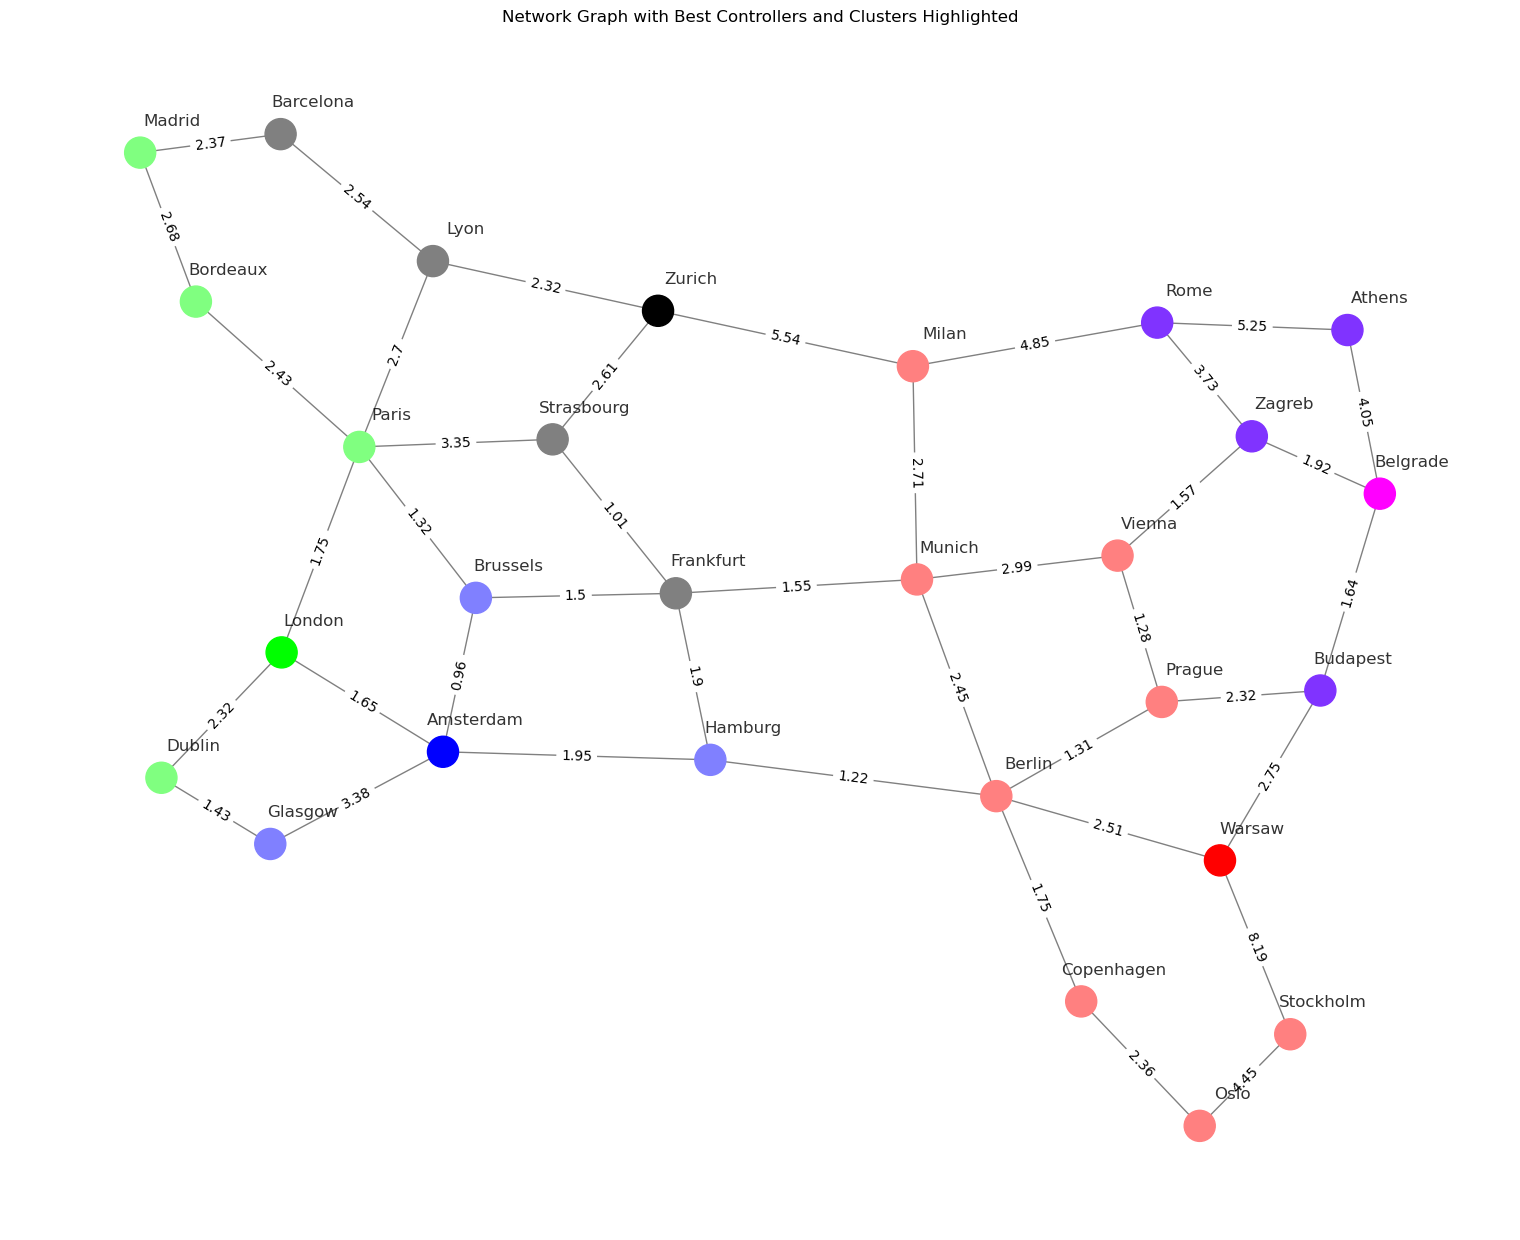

In [220]:
def plot_network(G, best_controllers, clusters, latency_matrix, y_off=0.05, x_off=0.05):
    pos = nx.spring_layout(G)
    node_colors = ['black' for _ in G.nodes()]
    
    controller_colors = {'blue': (0, 0, 1), 'green': (0, 1, 0), 'ed': (1, 0, 0), 'black': (0, 0, 0), 'purple': (1, 0, 1),  'agenta': (1, 0, 1), 'yellow': (1, 1, 0), 'brown': (0.5, 0.2, 0.1), 'pink': (1, 0.5, 0.5),'cyan': (0, 1, 1)}
    floral_colors = {'skyblue': (0.5, 0.5, 1), 'limegreen': (0.5, 1, 0.5), 'almon': (1, 0.5, 0.5), 'gray': (0.5, 0.5, 0.5), 'lavender': (0.5, 0.2, 1),  'orchid': (1, 0.2, 1), 'lemonchiffon': (1, 1, 0.5), 'peachpuff': (1, 0.5, 0.5), 'palevioletred': (1, 0.2, 0.5),'turquoise': (0, 1, 1)}
    for idx, controller in enumerate(best_controllers):
        node_colors[controller] = list(controller_colors.values())[idx % len(controller_colors)]

    for idx, (controller, switches) in enumerate(clusters.items()):
        floral_color = list(floral_colors.values())[idx % len(floral_colors)]
        for switch in switches:
            node_colors[switch] = floral_color
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}

    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')

    latency_list = latency_matrix.tolist()
    node_to_index = {node: i for i, node in enumerate(G.nodes())}

    edge_labels = {}
    for u, v in G.edges():
        edge_labels[(u, v)] = latency_list[node_to_index[u]][node_to_index[v]]

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)

    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

G = nx.read_gml("nobeleu.gml")
clusters = cluster_switches(latency_matrix, best_controllers, demand)
plot_network(G, best_controllers, clusters, latency_matrix)

In [221]:
import numpy as np

def calculate_throughput(latency_matrix, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        
        # Check if latency is not zero
        if latency != 0:
            throughput[nearest_controller] += bandwidth[i] / latency
        else:
            # If latency is zero, set throughput to a default value (e.g. bandwidth)
            throughput[nearest_controller] += bandwidth[i]
    
    return throughput

throughput = calculate_throughput(latency_matrix, best_controllers, bandwidth)
for i, controller in enumerate(best_controllers):
    print(f"Throughput for Controller {controller}: {throughput[i]}")

Throughput for Controller 0: 23.39523693977571
Throughput for Controller 13: 18.15691697673217
Throughput for Controller 25: 23.058351516992836
Throughput for Controller 27: 18.24288584757377
Throughput for Controller 3: 17.85454352115878


In [225]:
def calculate_packet_loss(latency_matrix, controllers, bandwidth, max_bandwidth_per_controller):
    num_nodes = len(latency_matrix)
    packet_loss = np.zeros(num_nodes)
    total_bandwidth_processed = np.zeros(len(controllers))
    congestion_factors = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        used_bandwidth = bandwidth[i]
        available_bandwidth = max_bandwidth_per_controller[controllers[nearest_controller]]
        
        if used_bandwidth > available_bandwidth:
            congestion_factor = used_bandwidth / available_bandwidth
        else:
            congestion_factor = 0
        
        total_bandwidth_processed[nearest_controller] += used_bandwidth
        congestion_factors[nearest_controller] = congestion_factor
    
    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        congestion_factor = congestion_factors[nearest_controller]
        
        packet_loss[i] = latency * congestion_factor
    
    packet_loss_percentage = (packet_loss / bandwidth) * 100
    
    return packet_loss, packet_loss_percentage

max_bandwidth_per_controller = np.random.randint(5, 10, size=num_nodes)
packet_loss, packet_loss_percentage = calculate_packet_loss(latency_matrix, best_controllers, bandwidth, max_bandwidth_per_controller)

for i in range(num_nodes):
    print(f"Packet loss for Node {i}: {packet_loss[i]}")
    print(f"Packet loss percentage for Node {i}: {packet_loss_percentage[i]:.2f}%")


Packet loss for Node 0: 0.0
Packet loss percentage for Node 0: 0.00%
Packet loss for Node 1: 4.38419851249579
Packet loss percentage for Node 1: 57.76%
Packet loss for Node 2: 5.287639474829947
Packet loss percentage for Node 2: 58.58%
Packet loss for Node 3: 0.0
Packet loss percentage for Node 3: 0.00%
Packet loss for Node 4: 3.5471009910346285
Packet loss percentage for Node 4: 38.54%
Packet loss for Node 5: 0.0
Packet loss percentage for Node 5: 0.00%
Packet loss for Node 6: 0.0
Packet loss percentage for Node 6: 0.00%
Packet loss for Node 7: 1.7753297680229865
Packet loss percentage for Node 7: 23.16%
Packet loss for Node 8: 6.020179371238055
Packet loss percentage for Node 8: 106.15%
Packet loss for Node 9: 0.0
Packet loss percentage for Node 9: 0.00%
Packet loss for Node 10: 2.10526386497859
Packet loss percentage for Node 10: 31.64%
Packet loss for Node 11: 0.0
Packet loss percentage for Node 11: 0.00%
Packet loss for Node 12: 0.0
Packet loss percentage for Node 12: 0.00%
Packet

Avg Latency

In [257]:
avg_latencies = {}
total_latency_all_clusters = 0
total_switches_all_clusters = 0

for i, (controller, switches) in enumerate(clusters.items()):
    controller_index = int(controller.split()[-1]) - 1  # Convert 'Controller X' to X-1
    total_latency = 0
    for switch in switches:
        total_latency += latency_matrix[switch, controller_index]
    avg_latency = total_latency / len(switches)
    avg_latencies[controller] = avg_latency
    total_latency_all_clusters += total_latency
    total_switches_all_clusters += len(switches)

for i, (controller, avg_latency) in enumerate(avg_latencies.items()):
    print(f"Average latency for cluster {i+1}: {avg_latency:.2f}")

overall_avg_latency = total_latency_all_clusters / total_switches_all_clusters
print(f"Overall average latency for all clusters: {overall_avg_latency:.2f}")


Average latency for cluster 1: 4.80
Average latency for cluster 2: 6.54
Average latency for cluster 3: 3.72
Average latency for cluster 4: 6.88
Average latency for cluster 5: 11.02
Overall average latency for all clusters: 6.17


Worst Case Latency

In [261]:
worst_case_latencies = {}
for controller, switches in clusters.items():
    controller_index = int(controller.split()[-1]) - 1
    worst_latency = 0
    for switch in switches:
        latency = latency_matrix[switch, controller_index]
        if latency > worst_latency:
            worst_latency = latency
    worst_case_latencies[controller] = worst_latency

for i, (controller, worst_latency) in enumerate(worst_case_latencies.items()):
    print(f"Worst-case latency for cluster {i+1}: {worst_latency:.2f}")

average_worst_latency = sum(worst_case_latencies.values()) / len(worst_case_latencies)
print(f"Average worst-case latency across all clusters: {average_worst_latency:.2f}")


Worst-case latency for cluster 1: 7.56
Worst-case latency for cluster 2: 9.34
Worst-case latency for cluster 3: 8.27
Worst-case latency for cluster 4: 10.45
Worst-case latency for cluster 5: 13.14
Average worst-case latency across all clusters: 9.75


Average Cost

In [258]:
avg_costs = {}
total_cost_all_clusters = 0
total_switches_all_clusters = 0

for controller, switches in clusters.items():
    total_cost = sum([cost[i] for i in switches])
    avg_cost = total_cost / len(switches)
    avg_costs[controller] = avg_cost
    total_cost_all_clusters += total_cost
    total_switches_all_clusters += len(switches)

for i, (controller, avg_cost) in enumerate(avg_costs.items()):
    print(f"Average cost for cluster {i+1}: {avg_cost:.2f}")

overall_avg_cost = total_cost_all_clusters / total_switches_all_clusters
print(f"Overall average cost for all clusters: {overall_avg_cost:.2f}")


Average cost for cluster 1: 5443.33
Average cost for cluster 2: 6805.00
Average cost for cluster 3: 5783.75
Average cost for cluster 4: 5407.50
Average cost for cluster 5: 5945.00
Overall average cost for all clusters: 5879.57


Average Cluster Throughput

In [232]:
import numpy as np

def calculate_throughput(latency_matrix, switches, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros((len(switches), len(controllers)))

    for i, switch in enumerate(switches):
        for j, controller in enumerate(controllers):
            latency = latency_matrix[switch, controller]
            
            # Check if latency is not zero
            if latency != 0:
                throughput[i, j] = bandwidth[switch] / latency
            else:
                # If latency is zero, set throughput to a default value (e.g. bandwidth)
                throughput[i, j] = bandwidth[switch]
    
    return throughput

throughput = calculate_throughput(latency_matrix, switches, best_controllers, bandwidth)

for i, switch in enumerate(switches):
    for j, controller in enumerate(best_controllers):
        print(f"Throughput for Switch {switch} to Controller {controller}: {throughput[i, j]}")

Throughput for Switch 1 to Controller 0: 0.6076976369645819
Throughput for Switch 1 to Controller 13: 0.5741409595830278
Throughput for Switch 1 to Controller 25: 0.899306100199956
Throughput for Switch 1 to Controller 27: 0.8605604859056267
Throughput for Switch 1 to Controller 3: 1.8741095026389207
Throughput for Switch 7 to Controller 0: 1.127395154679869
Throughput for Switch 7 to Controller 13: 0.9072529055411965
Throughput for Switch 7 to Controller 25: 2.7877407461174943
Throughput for Switch 7 to Controller 27: 0.9236490423883265
Throughput for Switch 7 to Controller 3: 4.674565275501896
Throughput for Switch 21 to Controller 0: 0.8436019516256928
Throughput for Switch 21 to Controller 13: 0.8203155740400401
Throughput for Switch 21 to Controller 25: 1.0969656250166309
Throughput for Switch 21 to Controller 27: 0.9586385813928328
Throughput for Switch 21 to Controller 3: 1.4593560547096247
Throughput for Switch 26 to Controller 0: 0.7465642422300196
Throughput for Switch 26 to 

In [259]:
average_throughput = np.mean(throughput, axis=0)
total_throughput = 0
num_clusters = len(best_controllers)

for j, controller in enumerate(best_controllers):
    total_throughput += average_throughput[j]
    print(f"Average throughput for Cluster {j+1}: {average_throughput[j]}")

overall_avg_throughput = total_throughput / num_clusters
print(f"Overall average throughput for all clusters: {overall_avg_throughput:.2f}")


Average throughput for Cluster 1: 0.8313147463750408
Average throughput for Cluster 2: 0.7274664259755506
Average throughput for Cluster 3: 1.7225197283556646
Average throughput for Cluster 4: 0.9304041954220419
Average throughput for Cluster 5: 2.706772129588605
Overall average throughput for all clusters: 1.38


Avg Cluster - Cluster Latency

In [256]:
cluster_indices = {controller: int(controller.split()[-1]) - 1 for controller in clusters.keys()}

avg_latency_between_clusters = {}
for i, (controller1, index1) in enumerate(cluster_indices.items()):
    for j, (controller2, index2) in enumerate(cluster_indices.items()):
        if i < j:  # Avoid duplicating pairs and self-pairing
            avg_latency_between_clusters[(controller1, controller2)] = (latency_matrix[index1, index2] + latency_matrix[index2, index1]) / 2

for (controller1, controller2), avg_latency in avg_latency_between_clusters.items():
    cluster1 = int(controller1.split()[-1])
    cluster2 = int(controller2.split()[-1])
    print(f"Average latency between cluster {cluster1} and cluster {cluster2}: {avg_latency:.2f}")

Average latency between cluster 0 and cluster 13: 3.62
Average latency between cluster 0 and cluster 25: 5.53
Average latency between cluster 0 and cluster 27: 5.53
Average latency between cluster 0 and cluster 3: 4.32
Average latency between cluster 13 and cluster 25: 3.81
Average latency between cluster 13 and cluster 27: 5.30
Average latency between cluster 13 and cluster 3: 7.94
Average latency between cluster 25 and cluster 27: 1.57
Average latency between cluster 25 and cluster 3: 9.02
Average latency between cluster 27 and cluster 3: 10.45


Link Utilisation

In [260]:
avg_demands = {}
total_demand_all_clusters = 0
total_switches_all_clusters = 0

for i, (controller, switches) in enumerate(clusters.items()):
    total_demand = 0
    for switch in switches:
        total_demand += demand[switch]
    avg_demand = total_demand / len(switches)
    avg_demands[controller] = avg_demand
    total_demand_all_clusters += total_demand
    total_switches_all_clusters += len(switches)

for i, (controller, avg_demand) in enumerate(avg_demands.items()):
    print(f"Average demand for cluster {i+1}: {avg_demand:.2f}")

overall_avg_demand = total_demand_all_clusters / total_switches_all_clusters
print(f"Overall average demand for all clusters: {overall_avg_demand:.2f}")


Average demand for cluster 1: 8.67
Average demand for cluster 2: 2.50
Average demand for cluster 3: 6.25
Average demand for cluster 4: 12.50
Average demand for cluster 5: 14.50
Overall average demand for all clusters: 8.43
